In [11]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from PIL import Image, ImageTk

# Step 1: Read the folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.png', '.jpeg')):
            img = cv2.imread(os.path.join(folder_path, filename))
            if img is not None:
                images.append((filename, img))
    return images

if __name__ == "__main__":
    folder_path = "C:\\Users\\ravik\\Desktop\\My images\\mine"
    
    # Step 1: Read the folder
    images = load_images_from_folder(folder_path)
    
    
    

In [12]:

# Step 2: Process images and collect face data
def detect_faces(images):
    face_data = []
    #face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    face_cascade = cv2.CascadeClassifier('C:\\Users\\ravik\\Documents\\GitHub\\opencv\\data\\haarcascades\\haarcascade_frontalface_default.xml')
    tempnum = 0
    for filename, img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        for (x, y, w, h) in faces:
            face = gray[y:y+h, x:x+w]    
            resized_face = cv2.resize(face, (180, 180))  # Define new_width and new_height   
            tempnum = tempnum+1
            faceId = "face"+str(tempnum)
            face_data.append((faceId, filename, resized_face))
    return face_data
# Step 2: Process images and collect face data
face_data = detect_faces(images)
# Create a DataFrame to store face data
df = pd.DataFrame(data={
    'FaceId': [faceId for faceId, _, _ in face_data],
    'Filename': [filename for _, filename, _ in face_data],
    'Face': [face for _, _, face in face_data],
    'Consider': [0] * len(face_data)
})
df
    

,FaceId,Filename,Face,Consider
0,face1,20161006_222700.jpg,"[[88, 87, 83, 81, 80, 85, 85, 77, 84, 80, 78, ...",0
1,face2,20161007_203010.jpg,"[[254, 254, 250, 254, 252, 254, 243, 210, 157,...",0
2,face3,20161007_203010.jpg,"[[174, 174, 174, 175, 175, 175, 175, 175, 175,...",0
3,face4,20161007_203010.jpg,"[[111, 87, 80, 76, 65, 64, 54, 46, 37, 31, 33,...",0
4,face5,20161007_203010.jpg,"[[185, 184, 186, 186, 186, 186, 185, 185, 184,...",0
...,...,...,...,...
74,face75,IMG_20220905_163224.jpg,"[[217, 217, 205, 189, 174, 158, 143, 127, 111,...",0
75,face76,IMG_20220905_163224.jpg,"[[76, 76, 79, 82, 85, 86, 86, 86, 82, 79, 78, ...",0
76,face77,IMG_20220905_163224.jpg,"[[98, 98, 95, 92, 88, 86, 84, 81, 83, 87, 90, ...",0
77,face78,IMG_20220905_163224.jpg,"[[63, 63, 64, 65, 63, 60, 62, 66, 69, 72, 74, ...",0


In [13]:
current_image_index = 0
filename = ""
user_choices = {}
def show_image(face_data):
    global current_image_index, user_choices, filename
    #filename, faces = face_data
    # Initialize variables
    current_image_index = 0

    # Function to show the next image
    def show_next_image(face_data):
        global current_image_index
        if current_image_index < len(face_data):
            face = face_data[current_image_index][2]
            load_and_display_image(face)
            current_image_index += 1
        else:
            messagebox.showinfo("Finished","All images are done!")
            root.destroy()

    # Function to load and display an image
    def load_and_display_image(face):
        image1 = Image.fromarray(face)
        image2 = image1.resize((300, 300))  # Resize the image to fit the window
        photo = ImageTk.PhotoImage(image2)
        image_label.config(image=photo)
        image_label.image = photo  # Keep a reference to prevent garbage collection

    # Function to handle the "Yes" button
    def answer_yes():
        faceId = face_data[current_image_index-1][0]
        user_choices[faceId] = 1
        show_next_image(face_data)

    # Function to handle the "No" button
    def answer_no():
        faceId = face_data[current_image_index-1][0]
        user_choices[faceId] = 0
        show_next_image(face_data)

    # Create the main window
    root = tk.Tk()
    root.title("Image Viewer")

    # Create a label to display the images
    image_label = tk.Label(root)
    image_label.pack()

    # Create "Yes" and "No" buttons
    yes_button = tk.Button(root, text="Yes", command=answer_yes)
    no_button = tk.Button(root, text="No", command=answer_no)
    yes_button.pack(side=tk.LEFT)
    no_button.pack(side=tk.RIGHT)

    # Show the first image
    show_next_image(face_data)

    # Start the Tkinter main loop
    root.mainloop()

In [14]:

import numpy as np
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import os
show_image(face_data)

In [15]:
user_choices

{'face1': 0,
 'face2': 0,
 'face3': 0,
 'face4': 0,
 'face5': 1,
 'face6': 0,
 'face7': 0,
 'face8': 0,
 'face9': 0,
 'face10': 0,
 'face11': 0,
 'face12': 0,
 'face13': 0,
 'face14': 0,
 'face15': 0,
 'face16': 0,
 'face17': 0,
 'face18': 0,
 'face19': 0,
 'face20': 0,
 'face21': 0,
 'face22': 0,
 'face23': 0,
 'face24': 1,
 'face25': 0,
 'face26': 0,
 'face27': 0,
 'face28': 1,
 'face29': 0,
 'face30': 0,
 'face31': 1,
 'face32': 0,
 'face33': 0,
 'face34': 1,
 'face35': 1,
 'face36': 0,
 'face37': 0,
 'face38': 0,
 'face39': 0,
 'face40': 1,
 'face41': 0,
 'face42': 0,
 'face43': 0,
 'face44': 0,
 'face45': 0,
 'face46': 0,
 'face47': 0,
 'face48': 0,
 'face49': 1,
 'face50': 0,
 'face51': 0,
 'face52': 0,
 'face53': 0,
 'face54': 0,
 'face55': 0,
 'face56': 0,
 'face57': 1,
 'face58': 0,
 'face59': 0,
 'face60': 0,
 'face61': 1,
 'face62': 0,
 'face63': 0,
 'face64': 0,
 'face65': 1,
 'face66': 0,
 'face67': 0,
 'face68': 0,
 'face69': 0,
 'face70': 1,
 'face71': 0,
 'face72': 0,
 

In [16]:

# Step 4: Append user choices to the existing dataframe
def append_user_choices(dataframe, user_choices):
    for faceId in user_choices:
        dataframe.loc[dataframe['FaceId'] == faceId, 'Consider'] = user_choices[faceId]
    return dataframe

# Step 4: Append user choices to the existing dataframe
df = append_user_choices(df, user_choices)
df

,FaceId,Filename,Face,Consider
0,face1,20161006_222700.jpg,"[[88, 87, 83, 81, 80, 85, 85, 77, 84, 80, 78, ...",0
1,face2,20161007_203010.jpg,"[[254, 254, 250, 254, 252, 254, 243, 210, 157,...",0
2,face3,20161007_203010.jpg,"[[174, 174, 174, 175, 175, 175, 175, 175, 175,...",0
3,face4,20161007_203010.jpg,"[[111, 87, 80, 76, 65, 64, 54, 46, 37, 31, 33,...",0
4,face5,20161007_203010.jpg,"[[185, 184, 186, 186, 186, 186, 185, 185, 184,...",1
...,...,...,...,...
74,face75,IMG_20220905_163224.jpg,"[[217, 217, 205, 189, 174, 158, 143, 127, 111,...",0
75,face76,IMG_20220905_163224.jpg,"[[76, 76, 79, 82, 85, 86, 86, 86, 82, 79, 78, ...",0
76,face77,IMG_20220905_163224.jpg,"[[98, 98, 95, 92, 88, 86, 84, 81, 83, 87, 90, ...",0
77,face78,IMG_20220905_163224.jpg,"[[63, 63, 64, 65, 63, 60, 62, 66, 69, 72, 74, ...",0


In [27]:
# Step 5: Prepare a convolution model for face recognition
def create_face_recognition_model(input_shape):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(2, activation='sigmoid')  # Binary classification (consider or not)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Prepare a convolution model for face recognition

X = np.array(df['Face'].tolist())
y = np.array(df['Consider'].tolist())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
input_shape = X_train[0].shape
input_shape

(180, 180)

In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume df is your DataFrame containing the data

# Convert the 'Face' column into NumPy arrays
X = df['Face'].tolist()

# Filter out empty arrays and get the maximum length for non-empty arrays
non_empty_X = [x for x in X if len(x) > 0]

# Determine the maximum sequence length (number of values in each list)
max_length = max(len(lst) for lst in non_empty_X)

# Pad the sequences to make them uniform in length
X_padded = pad_sequences(non_empty_X, maxlen=max_length, padding='post', dtype='float32')

# Assuming the 'Consider' column represents the labels
y = df['Consider'].values

# Create and train the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(max_length, len(X_padded[0]), 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data for CNN
X_padded = X_padded.reshape(X_padded.shape[0], X_padded.shape[1], X_padded.shape[2], 1)

# Step 6: Pass the dataframe to the convolution model
# Train the model
model.fit(X_padded, y, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
2/2 [==============================] - 2s 802ms/step - loss: 901.5297 - accuracy: 0.4762 - val_loss: 0.9921 - val_accuracy: 0.8125
Epoch 2/10
2/2 [==============================] - 1s 574ms/step - loss: 33.8242 - accuracy: 0.8889 - val_loss: 85.2248 - val_accuracy: 0.8125
Epoch 3/10
2/2 [==============================] - 1s 614ms/step - loss: 58.4008 - accuracy: 0.8413 - val_loss: 47.9103 - val_accuracy: 0.8125
Epoch 4/10
2/2 [==============================] - 1s 633ms/step - loss: 36.2048 - accuracy: 0.8413 - val_loss: 30.6815 - val_accuracy: 0.8125
Epoch 5/10
2/2 [==============================] - 1s 614ms/step - loss: 21.3528 - accuracy: 0.8413 - val_loss: 16.4302 - val_accuracy: 0.8125
Epoch 6/10
2/2 [==============================] - 1s 634ms/step - loss: 9.9065 - accuracy: 0.8413 - val_loss: 7.6514 - val_accuracy: 0.1875
Epoch 7/10
2/2 [==============================] - 1s 661ms/step - loss: 2.7974 - accuracy: 0.5556 - val_loss: 2.9354 - val_accuracy: 0.8125
Epoch 8/10

In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

1/1 [==============================] - 0s 195ms/step - loss: 0.1763 - accuracy: 0.9375
Test accuracy: 0.9375


In [30]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
cnn_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
cnn_from_pickle.predict(X_test) 




1/1 [==============================] - 0s 128ms/step


array([[4.90280688e-01],
       [8.92559588e-02],
       [2.40484148e-01],
       [1.51696877e-05],
       [2.53738612e-01],
       [6.08637417e-03],
       [2.18083203e-01],
       [4.32180203e-02],
       [5.58306694e-01],
       [9.89314690e-02],
       [2.45112151e-01],
       [9.01230633e-01],
       [8.65178090e-03],
       [3.22088525e-02],
       [3.54529470e-02],
       [1.16626055e-04]], dtype=float32)

In [32]:
model_output = model.predict(X_test)

1/1 [==============================] - 0s 103ms/step


In [33]:
# Assuming 'predictions' is your array of probabilities
predictions = model_output

# Apply a threshold of 0.5 to convert probabilities to binary predictions
binary_predictions = (predictions >= 0.5).astype(int)

print(binary_predictions)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


In [41]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [35]:
X_test

array([[[175, 176, 177, ..., 178, 180, 181],
        [178, 179, 179, ..., 180, 181, 180],
        [180, 181, 179, ..., 181, 180, 178],
        ...,
        [204, 205, 205, ..., 210, 198, 182],
        [204, 204, 205, ..., 203, 184, 155],
        [204, 204, 204, ..., 196, 167, 126]],

       [[ 88,  87,  83, ..., 238, 238, 238],
        [ 88,  85,  78, ..., 238, 238, 238],
        [ 87,  82,  81, ..., 238, 238, 238],
        ...,
        [ 57,  57,  54, ..., 227, 248, 246],
        [ 61,  61,  60, ..., 155, 242, 247],
        [ 63,  59,  71, ...,  59, 149, 251]],

       [[119, 119, 112, ..., 222, 223, 223],
        [119, 119, 112, ..., 222, 223, 223],
        [119, 119, 112, ..., 222, 224, 224],
        ...,
        [ 32,  32,  30, ..., 106, 106, 106],
        [ 31,  31,  29, ..., 105, 105, 105],
        [ 31,  31,  29, ..., 106, 105, 105]],

       ...,

       [[ 44,  44,  48, ...,  22,  21,  21],
        [ 44,  44,  48, ...,  22,  21,  21],
        [ 48,  48,  51, ...,  22,  21,  21

In [96]:
from IPython.display import Image, display
from PIL import Image as Im
from PIL import ImageOps

def show_verified_result(faces):
    model_output = model.predict(faces)
    
    # Assuming 'predictions' is your array of probabilities
    predictions = model_output

    # Apply a threshold of 0.5 to convert probabilities to binary predictions
    binary_predictions = (predictions >= 0.5).astype(int)
    
    # showing the results with images
    counter=0
    for imageName in faces:
        NewImage = Im.fromarray(imageName)
        #index_val = X_test.index(imageName)
        if binary_predictions[counter] == 1:
            expanded_im = ImageOps.expand(NewImage, border=20, fill='red')
            display(expanded_im)
        else:
            display(NewImage)
        counter=counter+1
    return binary_predictions

In [130]:
def identify_images(folder_path):
    images = load_images_from_folder(folder_path)

    face_data = detect_faces(images)

    df_final = pd.DataFrame(data={
        'FaceId': [faceId for faceId, _, _ in face_data],
        'Filename': [filename for _, filename, _ in face_data],
        'Face': [face for _, _, face in face_data],
        'Consider': [0] * len(face_data)
    })

    # Convert the 'Face' column into NumPy arrays
    X = np.array(df_final['Face'].tolist())

    user_choices = show_verified_result(X)
    df_final['Consider'] = user_choices
    return df_final

def move_images(source,destination):

    # gather all files
    allfiles = os.listdir(source)

    # iterate on all files to move them to destination folder
    for f in allfiles:
        #consider_value = df_final.loc[df_final['Filename'] == f, 'Consider'].iloc[0]
        #print(consider_value)
        if (df_final.loc[df_final['Filename'] == f, 'Consider'] == 1).any():
            print("consider as 1")
            src_path = os.path.join(source, f)
            dst_path = os.path.join(destination, f)
            os.rename(src_path, dst_path)


1/1 [==============================] - 0s 48ms/step


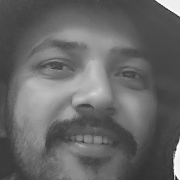

  FaceId             Filename  \
0  face1  20161006_222700.jpg   

                                                Face  Consider  
0  [[88, 87, 83, 81, 80, 85, 85, 77, 84, 80, 78, ...         0  


In [132]:
##Identify and move the images:
source = "C:\\Users\\ravik\\Desktop\\My images\\test"
destination = 'C:\\Users\\ravik\\Desktop\\My images\\my pics'

df_final = identify_images(folder_path)
print(df_final)

move_images(source,destination)

0
0
1
